# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

$$
f'(x) = \arctan x + \dfrac{x}{1+x^2} - \dfrac{x}{1+x^2} = \arctan x = 0 \Leftrightarrow x = 0 \\
f''(x) = \dfrac{1}{1+x^2} \\
x_{k+1} = x_k - \dfrac{f'(x_k)}{f''(x_k)} = x_k - (1+x_k^2)\arctan x_k$$

Рассмотрим уравнение$|x-(1+x^2)\arctan{x}| = x$.

Оно имеет 2 решения: 0 и 1.39. Сходимость при $x^0 < 1.39$.

In [139]:
import numpy as np
import scipy.linalg as la
import math
import matplotlib.pyplot as plt
import time
import random

In [140]:
def f(x):
    return x * np.arctan(x) - 0.5 * np.log(1+x**2)

def grad(x):
    return np.arctan(x)

def hess(x):
    return 1/(1+x**2)

def error(x):
    #return grad(x)**2
    #return x**2
    return abs(x)

def ND(x0, gamma, iters=1000):
    
    x = x0
    errs = []
    acc = []

    for k in range(iters):
        x = x - gamma(x,k) * (hess(x))**(-1) * grad(x)
        errs.append(error(x))

    return errs

# L = pi
def GD(x0, gamma, iters=1000):
    
    x = x0
    errs = []
    acc = []

    for k in range(iters):
        x = x - gamma(x,k) * grad(x)
        errs.append(error(x))

    return errs

In [141]:
def risovach(errs, labels, title=''):

    plt.figure(figsize=(8, 5))

    for err, lab in zip(errs, labels):
        plt.plot(range(len(err)), [np.log(e) for e in err], label=lab)
    ylabel = 'Логарифм критерия'

    plt.xlabel("Номер итерации")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.legend(fontsize=12)
    plt.show()

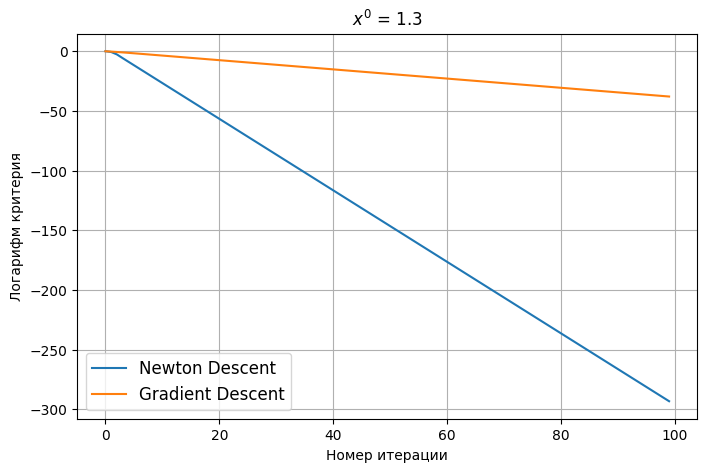

In [142]:
iters = 100
errs_ng = ND(1.3, gamma=lambda x, k: 0.95, iters=iters)
errs_gd = GD(1.3, gamma=lambda x, k: 0.32, iters=iters)
risovach(errs=[errs_ng, errs_gd], labels=['Newton Descent', 'Gradient Descent'], title=r'$x^0$ = 1.3')

Метод Ньютона значительно опережает градиентный спуск по итерациям. 

При $\gamma = 1$ и $x^0 = 1.5$ он, как и было предсказано, не сходится.

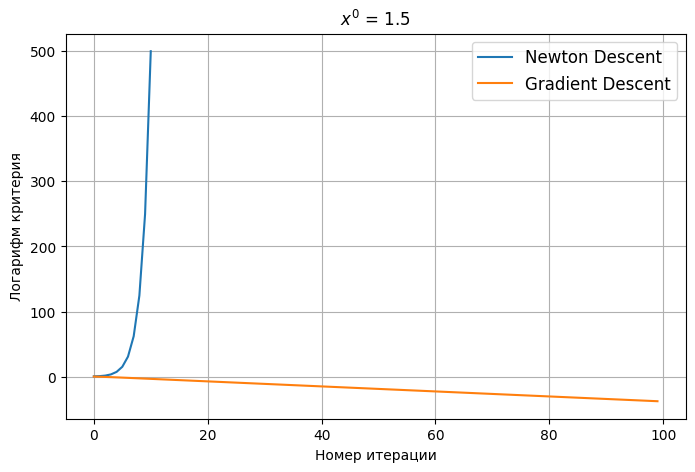

In [143]:
iters = 100
errs_ng = ND(1.5, gamma=lambda x, k: 1, iters=iters)
errs_gd = GD(1.5, gamma=lambda x, k: 0.32, iters=iters)
risovach(errs=[errs_ng, errs_gd], labels=['Newton Descent', 'Gradient Descent'], title=r'$x^0$ = 1.5')

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

Если взять $\gamma = 0.8 < 1$, можно добиться сходимости метода Ньютона и из начальной $x^0 = 1.5$.

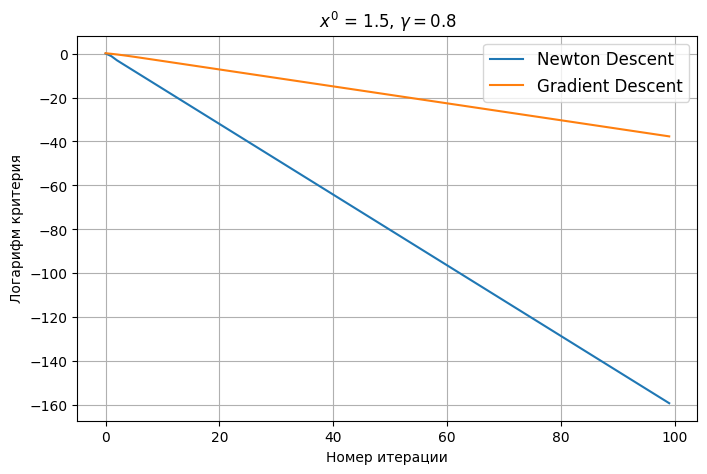

In [144]:
iters = 100
errs_ng = ND(1.5, gamma=lambda x, k: 0.8, iters=iters)
errs_gd = GD(1.5, gamma=lambda x, k: 0.32, iters=iters)
risovach(errs=[errs_ng, errs_gd], labels=['Newton Descent', 'Gradient Descent'], title=r'$x^0$ = 1.5, $\gamma = 0.8$')

Рассмотрим несколько стратегий: 
1. постоянный шаг;
2. уменьшающийся с 1 до 0;
3. увеличивающийся с 0 до 1;
4. правило Армихо.

In [145]:
def gamma_arm(x, k, eps=0.5, theta=0.99):
    gamma = 0.999
    while f(x) - f(x + gamma * grad(x)) > gamma * eps:
        gamma = gamma * theta
    return gamma

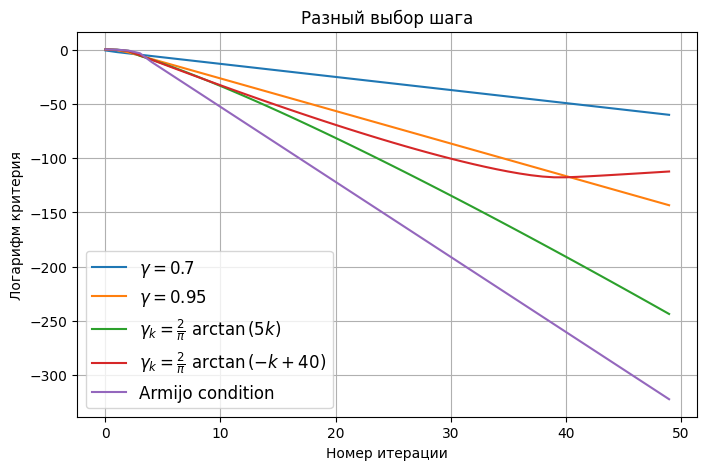

In [146]:
iters = 50
errs_const_1 = ND(1.3, gamma=lambda x, k: 0.7, iters=iters)
errs_const_2 = ND(1.3, gamma=lambda x, k: 0.95, iters=iters)
errs_incr = ND(1.3, gamma=lambda x, k: 2/3.1415 * np.arctan(5*k), iters=iters)
errs_decr = ND(1.3, gamma=lambda x, k: 2/3.1415 * np.arctan(-k + 40), iters=iters)
errs_arm = ND(1.3, gamma=gamma_arm, iters=iters)
risovach(errs=[errs_const_1, errs_const_2, errs_incr, errs_decr, errs_arm], 
         labels=[r'$\gamma = 0.7$', r'$\gamma = 0.95$', r'$\gamma_k = \frac{2}{\pi} \ \arctan{(5k)}$',
                 r'$\gamma_k = \frac{2}{\pi} \ \arctan{(-k + 40)} $', r'Armijo condition'], 
         title=r'Разный выбор шага')

Выводы:
1. постоянный шаг сходится лучше, если он близок к 1;
2. уменьшающийся шаг может расходиться;
3. увеличивающийся до 1 шаг показал себя очень неплохо;
4. в правиле Армихо следует брать начальный шаг $\gamma_0 \approx 1$, и большую $\theta \approx 0.9 - 0.99$.

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

$f(w) =  \dfrac{1}{n}\sum\limits_{i=1}^n \ln(1+\exp(-w^Tx_iy_i)) + \dfrac{\lambda}{2}\|w\|^2$

$\nabla f (w) =  -\dfrac{1}{n}\sum\limits_{i=1}^n \dfrac{1}{1 + e^{w^Tx_iy_i}}x_iy_i + \lambda w$

$\nabla^2 f(w) = \dfrac{1}{n}\sum\limits_{i=1}^n \dfrac{e^{w^Tx_iy_i}}{(1 + e^{w^Tx_iy_i})^2}(x_ix_i^T) y_i^2 + \lambda I$

In [147]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

dataset = "mushrooms.txt"
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

y = 2 * y - 3
n, d = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)
n_train = X_train.shape[0]

L = 5.25
lambd = L/100
x0 = np.random.uniform(low=-L/5, high=L/5, size=(d,))

In [148]:
from numba import jit
import warnings
warnings.filterwarnings("ignore")

@jit
def fi(x, i):
    return np.log(1 + np.exp(-x.T @ (y_train[i] * X_train[i].T))) + lambd/2 * np.linalg.norm(x, ord=2)**2

@jit
def gradi(x, i):
    return -y_train[i]/(1 + np.exp(x.T @  (X_train[i].T * y_train[i]))) * X_train[i].T + lambd * x

@jit
def hessi(x, i):
    ex = np.exp(x.T @  (X_train[i].T * y_train[i]))
    return ex / (1 + ex**2) * x @ x.T + lambd * np.eye(d)

@jit
def f(x):
    a = 0
    for i in range(n_train):
        a += fi(x, i)
    a = a/n_train
    return a

@jit
def grad(x):
    a = 0
    for i in range(n_train):
        a += gradi(x, i)
    a = a/n_train
    return a

@jit
def hess(x):
    a = 0
    for i in range(n_train):
        a += hessi(x, i)
    a = a/n_train
    return a

In [149]:
def error(x):
    return np.linalg.norm(grad(x), ord=2)**2

def ND(x0, gamma, iters=1000):
    
    x = x0
    errs = []
    acc = []

    for k in range(iters):
        B = np.linalg.inv(hess(x))
        x = x - gamma(x,k) * B @ grad(x)
        errs.append(error(x))

    return errs, x

def GD(x0, gamma, iters=1000):
    
    x = x0
    errs = []
    acc = []

    for k in range(iters):
        x = x - gamma(x,k) * grad(x)
        errs.append(error(x))

    return errs, x

def GD_help(x0, method, gamma_gd, gamma_met=1, iters=1000, q=0.9):

    iters_g = round(q * iters)
    iters_n = iters - iters_g

    errs_g, x_g = GD(x0, gamma=gamma_gd, iters=iters_g)
    errs_n, x_n = method(x_g, gamma=gamma_met, iters=iters_n)
    errs = np.concatenate([errs_g, errs_n], axis=0)

    return errs, x_n

In [150]:
iters = 50
errs_, _ = GD_help(x0, method=ND, gamma_gd=lambda x, k: 0.3, gamma_met=lambda x, k: 0.1, iters=iters, q=0.5)

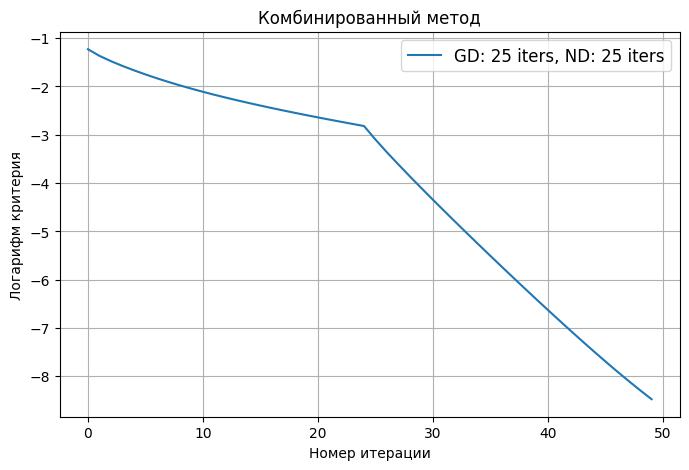

In [151]:
risovach(errs=[errs_], 
         labels=[r'GD: 25 iters, ND: 25 iters'], 
         title=r'Комбинированный метод')

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [ ]:
#ответ

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [ ]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [ ]:
#ответ